# Planetary Defense Lab
NASA’s Planetary Defense Coordination Office (PDCO) oversees the agency’s detection and ongoing tracking of asteroids and comets that could potentially pose a threat to the Earth.  By continually refining measurements of an object’s position and velocity on the sky through repeated observations, astronomers are able to better predict the orbital path of that object via simulations.  Today, we will examine a simplified model of these simulations.

Suppose the PDCO has heard about your stellar performance in class and has asked you to help them determine the risks posed by several asteroids.  Your job is to run the simulations for the asteroids tabulated below and report the missing pieces to NASA.  You must also determine which of the asteroids (if any) pose a direct collision threat with the Earth over the next 50 years. 

The data for this lab can be found [here.](https://github.com/ahinkel/AstronomyTeachingMaterials/blob/main/Labs/PlanetaryDefense/listOfAsteroidsForPD_Lab.xlsx)

The corresponding assignment can be found [here.](https://github.com/ahinkel/AstronomyTeachingMaterials/blob/main/Labs/PlanetaryDefense/PlanetaryDefenseLab.pdf)

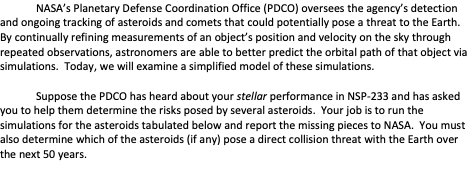
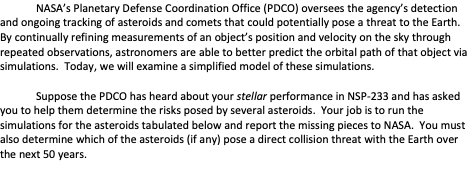
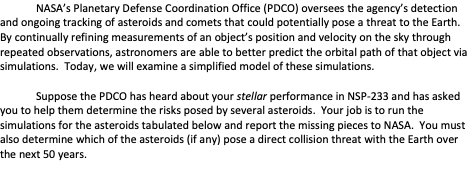
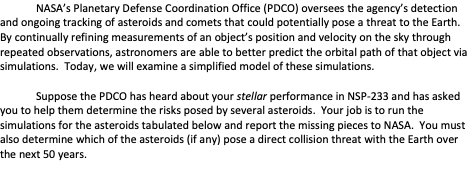

## Run the next three cells to prepare the lab:


In [1]:
# Python 3 environment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
G = 4*np.pi**2 # This is a constant of nature.
collisionTolerance = 4.26343e-5 #AU -- This is Earth's radius

In [2]:
def accel_x(xx, yy):
    return -(G*M)*xx/((xx*xx + yy*yy)**(1.5))

def accel_y(xx, yy):
    return -(G*M)*yy/((xx*xx + yy*yy)**(1.5))

def get_perihelion(xa, ya):
    ra = np.sqrt(np.array(xa)**2 + np.array(ya)**2)
    return min(ra)

def get_aphelion(xa, ya):
    ra = np.sqrt(np.array(xa)**2 + np.array(ya)**2)
    return max(ra)

def checkCollision(xe, ye, xa, ya, time):
    minimum_distance = 99 #temporary value
    perihelion = 99 #temporary value
    aphelion = 0 #temporary value
    time_of_min = -1 #temporary value
    collisionFlag = 0 #temporary value
    print("Asteroid perihelion in AU:", get_perihelion(xa, ya))
    print("Asteroid aphelion in AU:", get_aphelion(xa, ya))
    for i in range(0, len(time)):
        dist = np.sqrt((xe[i] - xa[i])**2 + (ye[i] - ya[i])**2)
        if dist < minimum_distance:
            minimum_distance = dist
            time_of_min = time[i]
        if dist < collisionTolerance:
            print("WARNING! COLLISION IMMINENT! Collision expected in", time[i], "years.")
            collisionFlag = 1
    if collisionFlag == 0:
        print("No collision in given time frame.")
        print("The closest the asteroid comes to Earth is:", minimum_distance, "AU.")
        print("The time of closest approach is:", time_of_min, "years from now.")


In [3]:
#DO NOT CHANGE THIS CELL

M = 1 #solar masses
N_iter = 5000000 #this times timestep is in years
tStep = 0.00001
print("Simulating the next ", N_iter*tStep, " years.")

#Earth Initial Conditions:
xi  = 1 #AU
yi  = 0 #AU
vxi = 0 # AU/yr
vyi = 6.283185 #AU/yr

Simulating the next  50.00000000000001  years.


## Update the cell below with the asteroid position and velocity values from the lab assignment:

In [4]:
#UPDATE THIS CELL FOR EACH ASTEROID YOU'D LIKE TO SIMULATE

#Asteroid Initial Conditions:
xi_ast = -3.442 #This is the asteroid's initial x position in units of AU
yi_ast = 0.655 #This is the asteroid's initial y position in units of AU
vxi_ast = -0.1003 #This is the asteroid's initial velocity in the x direction in AU/yr 
vyi_ast = 1.4641 #This is the asteroid's initial velocity in the y direction in AU/yr 


## Run Simulation:


In [5]:
#Trajectory Logs:
x_log = [xi]
y_log = [yi]
t_log = [0]
x_log_ast = [xi_ast]
y_log_ast = [yi_ast]

#First Step Earth:
ax_temp = accel_x(xi, yi)
ay_temp = accel_y(xi, yi)

xFirstStep = xi + vxi*tStep + 0.5*ax_temp*tStep**2 #Old school physics style.
yFirstStep = yi + vyi*tStep + 0.5*ay_temp*tStep**2 #Old school physics style.

xPrev  = xi
yPrev  = yi
xCurr  = xFirstStep
yCurr  = yFirstStep

#First Step Asteroid:
ax_temp_ast = accel_x(xi_ast, yi_ast)
ay_temp_ast = accel_y(xi_ast, yi_ast)

xFirstStep_ast = xi_ast + vxi_ast*tStep + 0.5*ax_temp_ast*tStep**2 #Old school physics style.
yFirstStep_ast = yi_ast + vyi_ast*tStep + 0.5*ay_temp_ast*tStep**2 #Old school physics style.

xPrev_ast  = xi_ast
yPrev_ast  = yi_ast
xCurr_ast  = xFirstStep_ast
yCurr_ast  = yFirstStep_ast

In [6]:
#Earth All successive steps: 
for i in range(0, N_iter):
    xNext = 2*xCurr - xPrev + accel_x(xCurr, yCurr)*tStep**2
    yNext = 2*yCurr - yPrev + accel_y(xCurr, yCurr)*tStep**2
    #iterate forward:
    xPrev = xCurr
    yPrev = yCurr
    xCurr = xNext
    yCurr = yNext
    t_log.append(i*tStep)
    x_log.append(xCurr)
    y_log.append(yCurr)

#Asteroid All successive steps: 
for i in range(0, N_iter):
    xNext_ast = 2*xCurr_ast - xPrev_ast + accel_x(xCurr_ast, yCurr_ast)*tStep**2
    yNext_ast = 2*yCurr_ast - yPrev_ast + accel_y(xCurr_ast, yCurr_ast)*tStep**2
    #iterate forward:
    xPrev_ast = xCurr_ast
    yPrev_ast = yCurr_ast
    xCurr_ast = xNext_ast
    yCurr_ast = yNext_ast
    x_log_ast.append(xCurr_ast)
    y_log_ast.append(yCurr_ast)

## Plot Orbital Trajectories and Check for Collision:


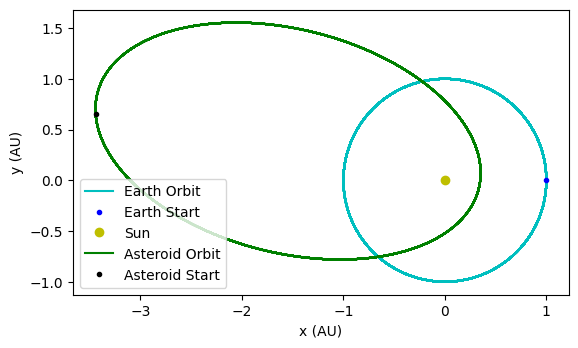

Asteroid perihelion in AU: 0.34382635666605343
Asteroid aphelion in AU: 3.530179284080042
No collision in given time frame.
The closest the asteroid comes to Earth is: 0.05391035719330813 AU.
The time of closest approach is: 36.646770000000004 years from now.


In [7]:
plt.plot(x_log[::10], y_log[::10], 'c-') #Earth traj
plt.plot(xi, yi, 'b.') #Earth IC
plt.plot(0, 0, 'yo') #SUN 
plt.plot(x_log_ast[::10], y_log_ast[::10], 'g-') #asteroid traj
plt.plot(xi_ast, yi_ast, 'k.') #asteroid IC
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.gca().set_aspect('equal')
plt.legend(['Earth Orbit', 'Earth Start', 'Sun', 'Asteroid Orbit', 'Asteroid Start'])
plt.show()

checkCollision(x_log, y_log, x_log_ast, y_log_ast, t_log)